In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier

In [2]:
#Create a path to where your data is stored.
path = r'C:\Users\Admin\Documents\Career Foundry\Machine Learning Specialization\ML Data'

In [3]:
#Read in the European weather data.
climate = pd.read_csv(os.path.join(path, 'weather-prediction-dataset-scaled_data.csv'))

In [4]:
#Read in the plesant weather data.
answers = pd.read_csv(os.path.join(path, 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

In [5]:
#listing the column names to compare to the cities in the answers set
#list(climate)

In [6]:
#list(answers)

In [7]:
#Create an 'X' matrix by dropping the unneeded columns.
#The weather stations GDANSK, ROMA and TOUR are not included in out pleasant-climate-dataset
X = climate.drop(['DATE','MONTH',
'GDANSK_cloud_cover','GDANSK_humidity','GDANSK_precipitation','GDANSK_snow_depth','GDANSK_temp_mean','GDANSK_temp_min','GDANSK_temp_max',
'ROMA_cloud_cover','ROMA_wind_speed','ROMA_humidity','ROMA_pressure','ROMA_sunshine','ROMA_temp_mean',
'TOURS_wind_speed','TOURS_humidity','TOURS_pressure','TOURS_global_radiation','TOURS_precipitation',
'TOURS_temp_mean','TOURS_temp_min','TOURS_temp_max',  
                 ], axis=1)
y = answers.drop(['DATE'], axis=1)

In [8]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [9]:
#Run the model with neighbors equal to 1 to 4, test the accuracy
k_range = np.arange(1,4)
train_acc = np.empty(len(k_range))
test_acc = np.empty(len(k_range))
scores = {}
scores_list = []
for i, k in enumerate(k_range):
    print("i -", i)
   # print("k -", k_range)
    knn = KNeighborsClassifier(n_neighbors=k)
    classifier = MultiOutputClassifier(knn, n_jobs=-1) #ADD THIS LINE
    ## Fit the model on the training data.
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    train_acc[i] = classifier.score(X_train, np.array(y_train)) #changed classifier
    test_acc[i] = classifier.score(X_test, np.array(y_test)) #changed classifier

i - 0
i - 1
i - 2


<function matplotlib.pyplot.show(close=None, block=None)>

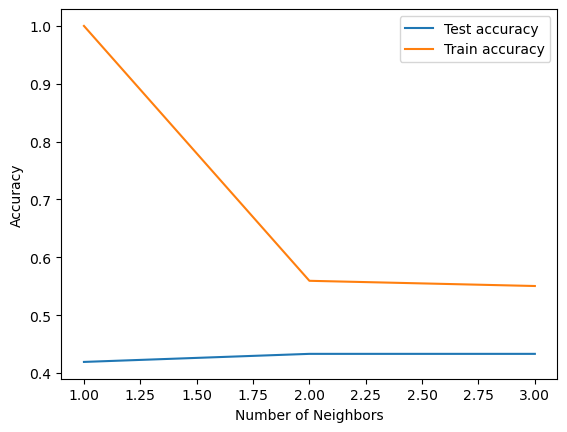

In [10]:
#Plot the relationship between number of neighbors and accuracy.
plt.plot(k_range, test_acc, label = 'Test accuracy')
plt.plot(k_range, train_acc, label = 'Train accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show

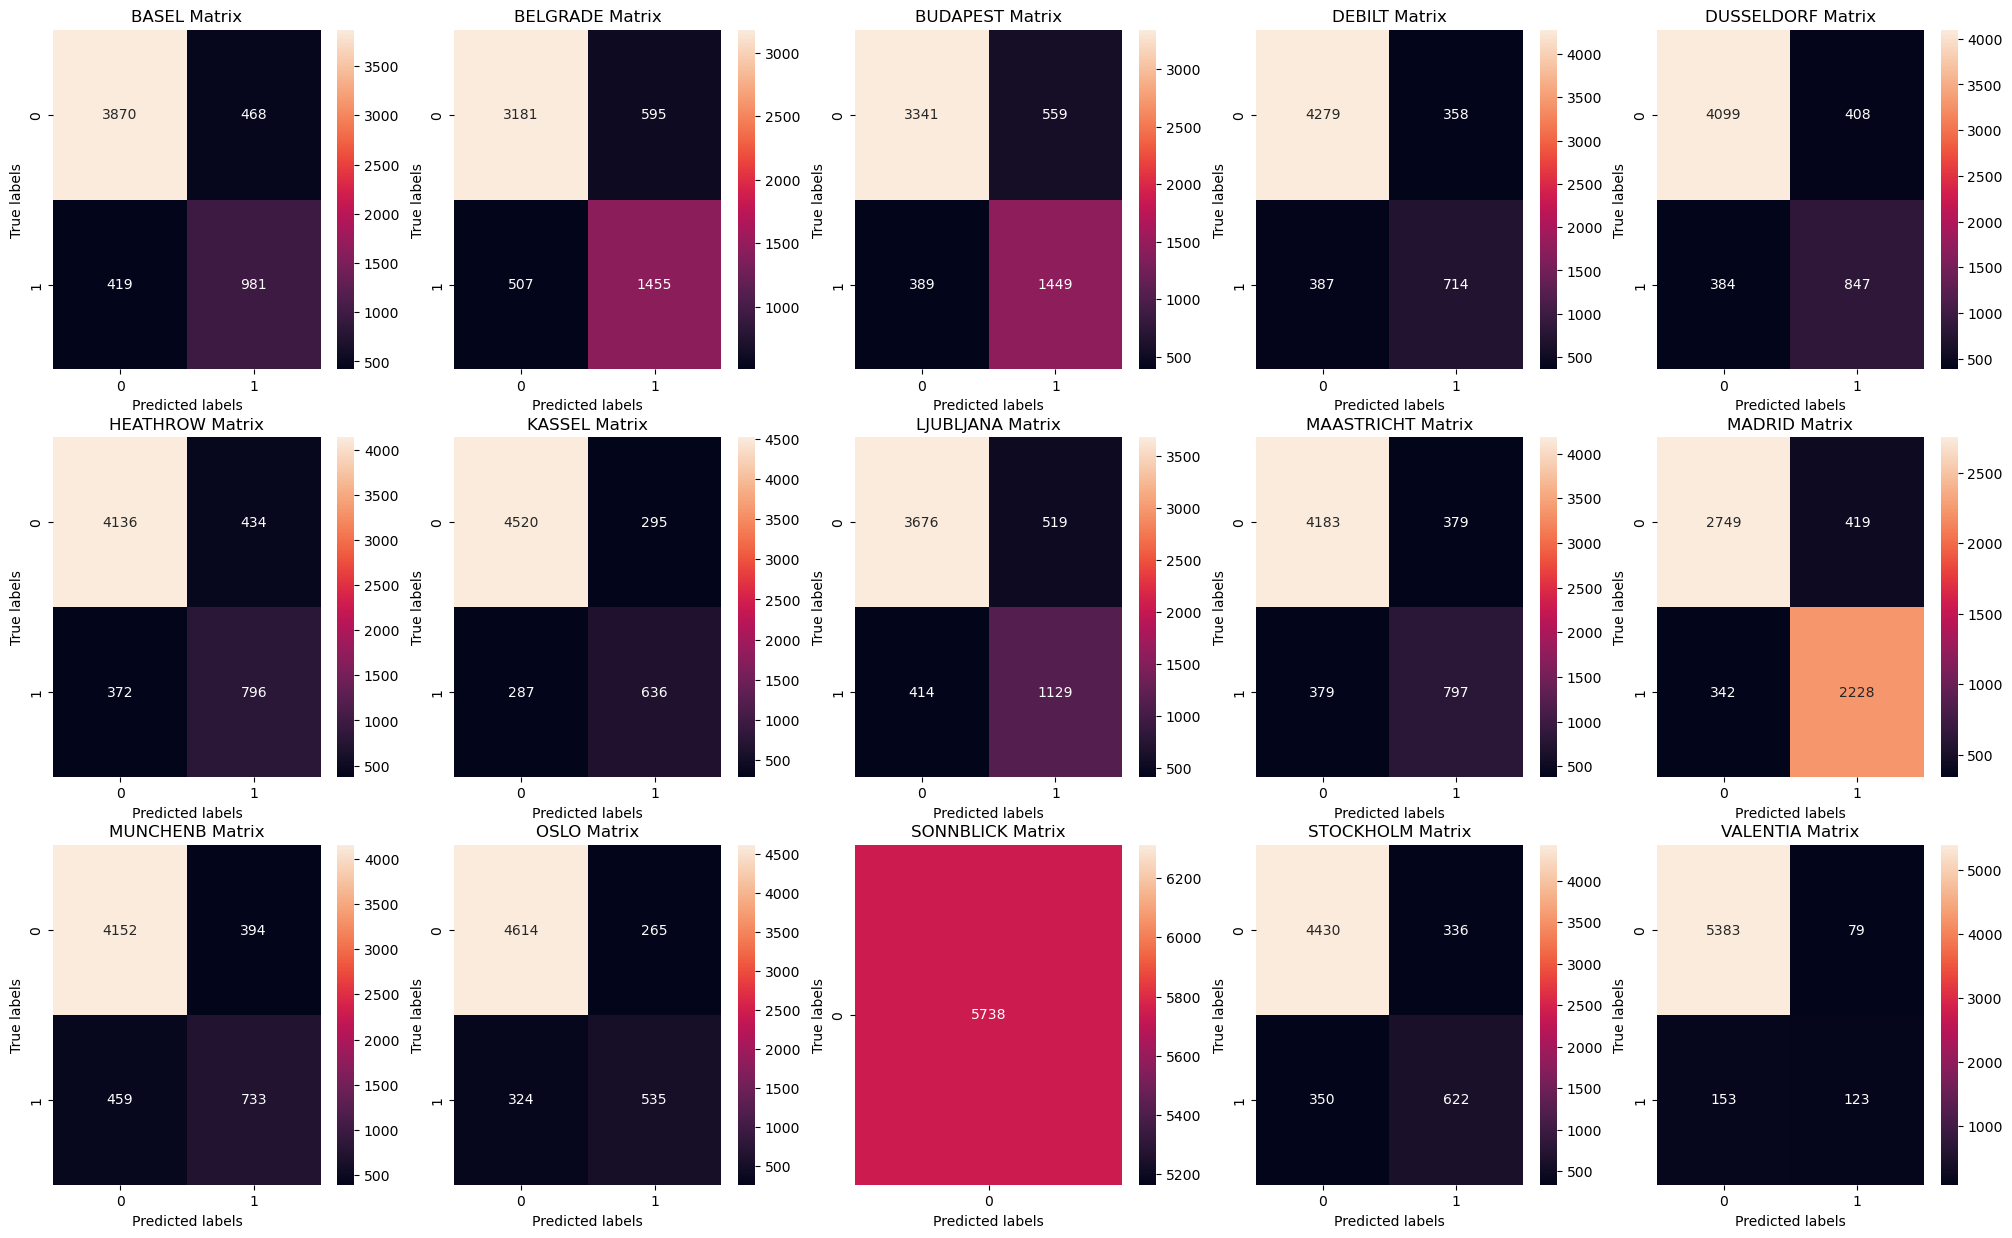

In [13]:
locations = list({x.split("_")[0] for x in answers.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations

key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1